In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2023-09-29 06:50:13.778091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-29 06:50:13.822450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-29 06:50:13.822771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!pip install opencv-python  protobuf==3.20.* tensorflow==2.7.0 tensorflow-estimator==2.7.0 keras scikeras tqdm google-auth==2.6.0 google-auth-oauthlib==0.4.6 google-pasta==0.2.0


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
pip freeze

absl-py==1.4.0
anyio==3.7.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.2.1
astunparse==1.6.3
attrs==23.1.0
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
cachetools==5.3.1
certifi==2019.11.28
cffi==1.15.1
chardet==3.0.4
comm==0.1.3
contourpy==1.1.0
cycler==0.11.0
dbus-python==1.2.16
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.2
executing==1.2.0
fastjsonschema==2.17.1
flatbuffers==2.0.7
fonttools==4.40.0
fqdn==1.5.1
gast==0.4.0
google-auth==2.6.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.56.0
h5py==3.9.0
idna==2.8
importlib-metadata==6.7.0
importlib-resources==5.12.0
ipykernel==6.24.0
ipython==8.12.2
ipython-genutils==0.2.0
ipywidgets==8.0.7
isoduration==20.11.0
jedi==0.18.2
Jinja2==3.1.2
joblib==1.3.2
jsonpointer==2.4
jsonschema==4.18.0
jsonschema-specifications==2023.6.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.6.3
jupyter-http-over-ws==0.0.8
jupyter_client==8.3.0
jupyter_core==5.3.1
jupyter

In [1]:
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [2]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [11]:
from tensorflow.python.framework.config import set_memory_growth
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [31]:
grid_image = cv2.imread("./Grid_Image.jpeg")
grid_image = grid_image[:,:,::-1]

In [38]:
# Define resize factor

# [2, 4, 5, 7, 8, 10, 15]
Reduce_factors = [4, 8, 15] # อย่างน้อย 3 ค่า

# Define interpolation method
inter_methods = [cv2.INTER_NEAREST,cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]

grid_images_resized = []

for factor in Reduce_factors:

  tmp_grid = []

  for inter in inter_methods:
    # print(factor, inter)

    height, width, channels = grid_image.shape
#     print(height, width)
    Scale_factor = (int(width * ( 1/factor )), int(height * ( 1/factor )))
    new_image = cv2.resize(grid_image, dsize=Scale_factor, interpolation=inter)
    tmp_grid.append(new_image)
    
  grid_images_resized.append(tmp_grid)

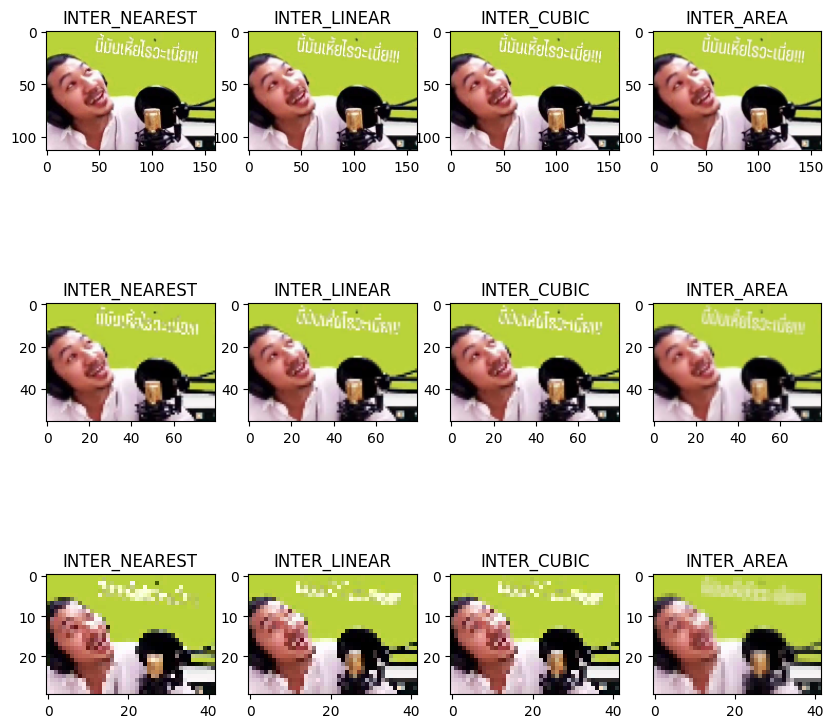

In [39]:
plt.figure(figsize=(10,10))

for i, _ in enumerate(Reduce_factors):
    plt.subplot(3, 4, 1+(4*i))
    plt.title("INTER_NEAREST")
    plt.imshow(grid_images_resized[i][0])
    plt.subplot(3, 4, 2+(4*i))
    plt.title("INTER_LINEAR")
    plt.imshow(grid_images_resized[i][1])
    plt.subplot(3, 4, 3+(4*i))
    plt.title("INTER_CUBIC")
    plt.imshow(grid_images_resized[i][2])
    plt.subplot(3, 4, 4+(4*i))
    plt.title("INTER_AREA")
    plt.imshow(grid_images_resized[i][3])